In [265]:
# import library used for data management

import numpy as np 
import pandas as pd 

In [266]:
hotel = pd.read_csv('vaishu_features.csv') 

In [267]:
hotel.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
stays_in_week_nights    119390 non-null int64
adults                  119390 non-null int64
children                119386 non-null float64
babies                  119390 non-null int64
meal                    119390 non-null object
country                 118902 non-null object
market_segment          119390 non-null object
distribution_channel    119390 non-null object
customer_type           119390 non-null object
lead_time               119390 non-null int64
is_canceled             119390 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 10.0+ MB


In [268]:
hotel

,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,customer_type,lead_time,is_canceled
0,0,2,0.0,0,BB,PRT,Direct,Direct,Transient,342,0
1,0,2,0.0,0,BB,PRT,Direct,Direct,Transient,737,0
2,1,1,0.0,0,BB,GBR,Direct,Direct,Transient,7,0
3,1,1,0.0,0,BB,GBR,Corporate,Corporate,Transient,13,0
4,2,2,0.0,0,BB,GBR,Online TA,TA/TO,Transient,14,0
...,...,...,...,...,...,...,...,...,...,...,...
119385,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,Transient,23,0
119386,5,3,0.0,0,BB,FRA,Online TA,TA/TO,Transient,102,0
119387,5,2,0.0,0,BB,DEU,Online TA,TA/TO,Transient,34,0
119388,5,2,0.0,0,BB,GBR,Online TA,TA/TO,Transient,109,0


In [269]:
hotel.describe()

,stays_in_week_nights,adults,children,babies,lead_time,is_canceled
count,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000
mean,2.500302,1.856403,0.103890,0.007949,104.011416,0.370416
std,1.908286,0.579261,0.398561,0.097436,106.863097,0.482918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,18.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000,69.000000,0.000000
75%,3.000000,2.000000,0.000000,0.000000,160.000000,1.000000
max,50.000000,55.000000,10.000000,10.000000,737.000000,1.000000


In [270]:
hotel['customer_type'].describe()

count        119390
unique            4
top       Transient
freq          89613
Name: customer_type, dtype: object

In [271]:
hotel['country'].describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

In [272]:
hotel['meal'].describe()

count     119390
unique         5
top           BB
freq       92310
Name: meal, dtype: object

In [273]:
hotel['market_segment'].describe()

count        119390
unique            8
top       Online TA
freq          56477
Name: market_segment, dtype: object

In [274]:
hotel['distribution_channel'].describe()

count     119390
unique         5
top        TA/TO
freq       97870
Name: distribution_channel, dtype: object

In [275]:
# Handling missing values

In [276]:
# See the missing Values for Children
hotel[hotel['children'].isnull()]

,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,customer_type,lead_time,is_canceled
40600,0,2,NaN,0,BB,PRT,Undefined,Undefined,Transient-Party,2,1
40667,2,2,NaN,0,BB,PRT,Direct,Undefined,Transient-Party,1,1
40679,2,3,NaN,0,BB,PRT,Undefined,Undefined,Transient-Party,1,1
41160,5,2,NaN,0,BB,PRT,Online TA,Undefined,Transient-Party,8,1


In [277]:
# replcae the missing values of children with the median value
hotel['children'].fillna(hotel['children'].median(),inplace = True)

In [278]:
# See the missing Values for country
hotel[hotel['country'].isnull()]

,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,customer_type,lead_time,is_canceled
30,10,1,0.0,0,BB,NaN,Direct,Direct,Transient,118,0
4127,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,Transient,0,1
7092,1,1,0.0,0,BB,NaN,Corporate,Corporate,Transient,8,1
7860,5,2,0.0,0,HB,NaN,Direct,Direct,Transient,39,1
8779,1,1,0.0,0,BB,NaN,Corporate,Corporate,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...
65908,0,0,0.0,0,SC,NaN,Complementary,Corporate,Transient,0,1
65909,0,0,0.0,0,SC,NaN,Complementary,Corporate,Transient,0,1
65910,0,0,0.0,0,SC,NaN,Complementary,Corporate,Transient,0,1
80830,2,1,0.0,0,BB,NaN,Groups,TA/TO,Transient-Party,4,0


In [279]:
# Groupby customer_type and find the most frequenct country for each customer_type
hotel.groupby('customer_type')['country'].agg(pd.Series.mode)

customer_type
Contract           PRT
Group              PRT
Transient          PRT
Transient-Party    PRT
Name: country, dtype: object

In [280]:
# Replace missing values in "county" with most frequent appeared value for country in each the customer_type 
hotel["country"] = hotel.groupby("customer_type")['country'].transform(lambda x: x.fillna(x.mode()[0]))

In [281]:
# convert the number of children to int
hotel['children'] = hotel['children'].astype(int)

In [282]:
# Groupby country and find how many cancelled and not cancelled each country has
hotelcountrycount = hotel.groupby(['country','is_canceled'])['is_canceled'].size().reset_index(name='count_cancelled')

In [283]:
# hotelcountrysum= hotel.groupby('country')['is_canceled'].agg(pd.Series.sum).reset_index(name='sum') 
hotelcountrysum = hotel.groupby('country')['is_canceled'].count().reset_index(name='sum')

In [284]:
hotelcountrycount

,country,is_canceled,count_cancelled
0,ABW,0,2
1,AGO,0,157
2,AGO,1,205
3,AIA,0,1
4,ALB,0,10
...,...,...,...
287,ZAF,1,31
288,ZMB,0,1
289,ZMB,1,1
290,ZWE,0,2


In [285]:
hotelcountrysum

,country,sum
0,ABW,2
1,AGO,362
2,AIA,1
3,ALB,12
4,AND,7
...,...,...
172,VGB,1
173,VNM,8
174,ZAF,80
175,ZMB,2


In [286]:
# left join the sum and count
countryjoined= hotelcountrycount.merge(hotelcountrysum, on='country', how='left')

In [287]:
countryjoined

,country,is_canceled,count_cancelled,sum
0,ABW,0,2,2
1,AGO,0,157,362
2,AGO,1,205,362
3,AIA,0,1,1
4,ALB,0,10,12
...,...,...,...,...
287,ZAF,1,31,80
288,ZMB,0,1,2
289,ZMB,1,1,2
290,ZWE,0,2,4


In [288]:
# finding the percentage of each label in a country
countryjoined['percentage'] = countryjoined.apply(lambda x: x['count_cancelled']/x['sum'], axis=1)
countryjoined

,country,is_canceled,count_cancelled,sum,percentage
0,ABW,0,2,2,1.000000
1,AGO,0,157,362,0.433702
2,AGO,1,205,362,0.566298
3,AIA,0,1,1,1.000000
4,ALB,0,10,12,0.833333
...,...,...,...,...,...
287,ZAF,1,31,80,0.387500
288,ZMB,0,1,2,0.500000
289,ZMB,1,1,2,0.500000
290,ZWE,0,2,4,0.500000


In [289]:
# remove all countires whose majority label is less than 80%
countryjoined = countryjoined[countryjoined['percentage'] > 0.8] 

In [290]:
countryjoined

,country,is_canceled,count_cancelled,sum,percentage
0,ABW,0,2,2,1.000000
3,AIA,0,1,1,1.000000
4,ALB,0,10,12,0.833333
9,ARE,1,43,51,0.843137
14,ASM,0,1,1,1.000000
...,...,...,...,...,...
256,TGO,0,2,2,1.000000
260,TJK,1,8,9,0.888889
271,UGA,0,2,2,1.000000
274,UMI,1,1,1,1.000000


In [291]:
# remove all countries whose sum is less than 5000
countryjoined= countryjoined[countryjoined['sum'] > 5000]

In [292]:
# most predictive countries. With >80% majority label and more than 5000 entries
countryjoined

,country,is_canceled,count_cancelled,sum,percentage
69,DEU,0,6069,7287,0.832853
92,FRA,0,8481,10415,0.814306


In [293]:
hotel.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
stays_in_week_nights    119390 non-null int64
adults                  119390 non-null int64
children                119390 non-null int64
babies                  119390 non-null int64
meal                    119390 non-null object
country                 119390 non-null object
market_segment          119390 non-null object
distribution_channel    119390 non-null object
customer_type           119390 non-null object
lead_time               119390 non-null int64
is_canceled             119390 non-null int64
dtypes: int64(6), object(5)
memory usage: 10.0+ MB


In [294]:
# Data Visualization

In [295]:
# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

In [296]:
# Boxplot : Numeric Values

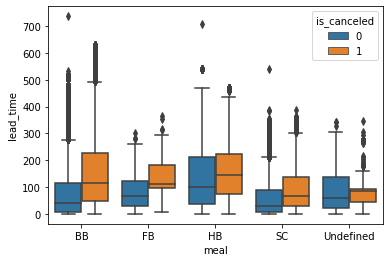

In [297]:
sns.boxplot(x="meal", y="lead_time", hue="is_canceled", data=hotel);

In [298]:
# histogram for numeric features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116601310>,
      dtype=object)

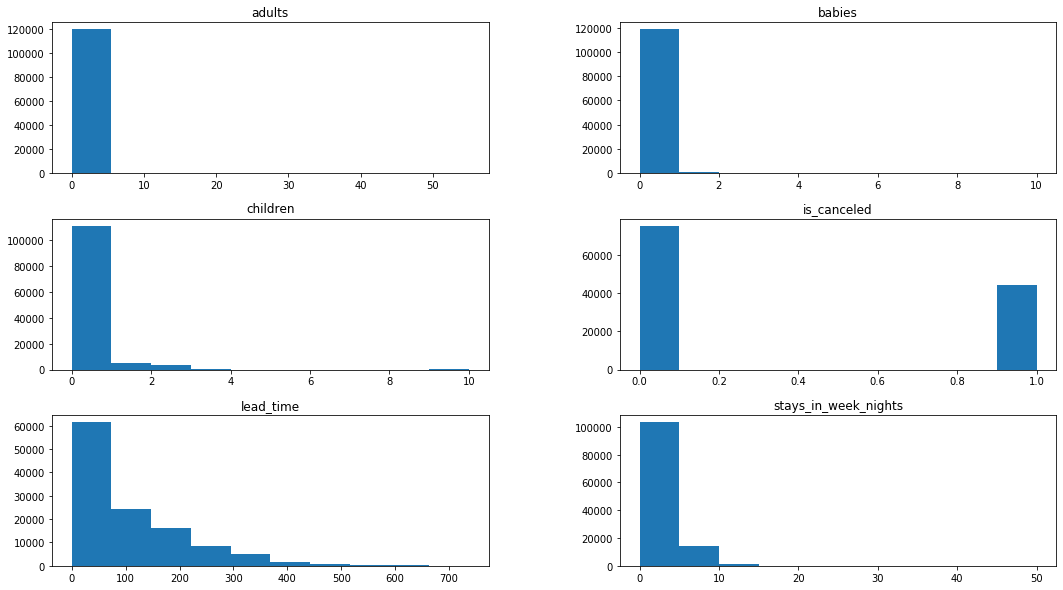

In [299]:
hotel.hist(bins=10,figsize=(18,10),grid=False)

In [300]:
# Bar Chart: Categorical

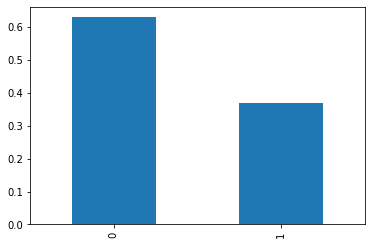

In [301]:
hotel['is_canceled'].value_counts(normalize=True).plot(kind='bar')

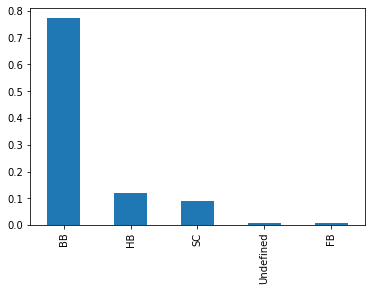

In [302]:
hotel['meal'].value_counts(normalize=True).plot(kind='bar')

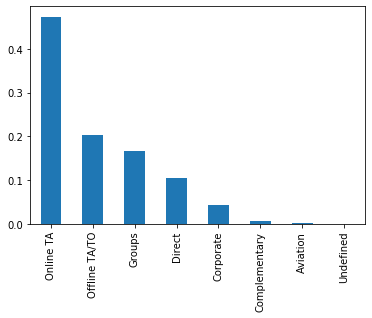

In [303]:
hotel['market_segment'].value_counts(normalize=True).plot(kind='bar')

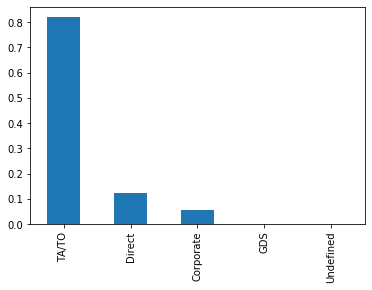

In [304]:
hotel['distribution_channel'].value_counts(normalize=True).plot(kind='bar')

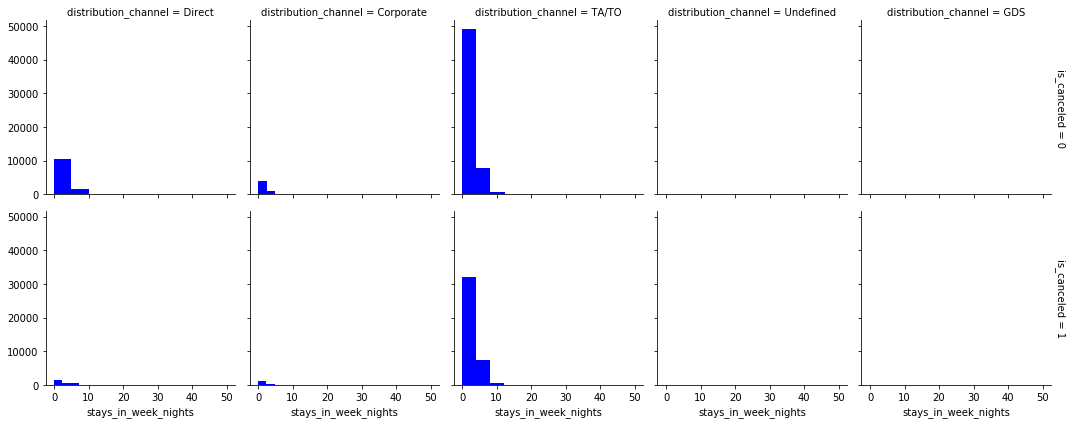

In [305]:
# 3 dimensional histogram for distribution_channel, stays_in_week_nights, is_canceled
g = sns.FacetGrid(hotel, col='distribution_channel', row='is_canceled', margin_titles=True)
g.map(plt.hist,'stays_in_week_nights',color='blue')

In [306]:
# Scatter Plots

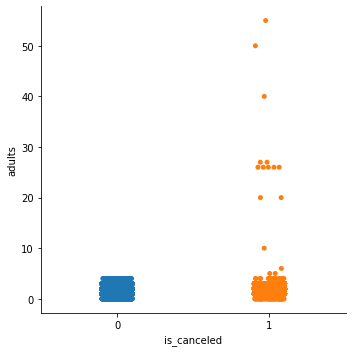

In [307]:
sns.catplot(x="is_canceled", y="adults", data=hotel);

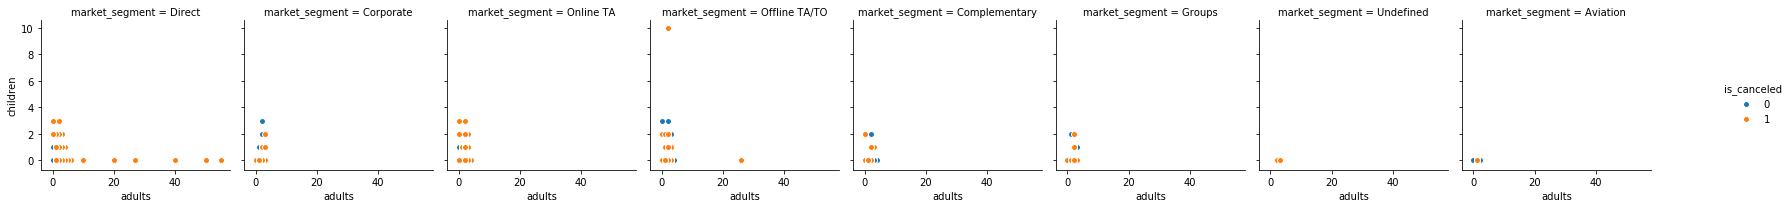

In [308]:
g = sns.FacetGrid(hotel, hue='is_canceled', col='market_segment', margin_titles=True)
g=g.map(plt.scatter, 'adults', 'children',edgecolor='w').add_legend()

In [309]:
# normalisation of numeric variables

In [310]:
from sklearn import preprocessing

In [311]:
minmax_scaler = preprocessing.MinMaxScaler().fit(hotel[['stays_in_week_nights']])
hotel['stays_in_week_nights_minmax']=minmax_scaler.transform(hotel[['stays_in_week_nights']])
hotel['stays_in_week_nights_minmax']

0         0.00
1         0.00
2         0.02
3         0.02
4         0.04
          ... 
119385    0.10
119386    0.10
119387    0.10
119388    0.10
119389    0.14
Name: stays_in_week_nights_minmax, Length: 119390, dtype: float64

In [312]:
minmax_scaler = preprocessing.MinMaxScaler().fit(hotel[['adults']])
hotel['adults_minmax']=minmax_scaler.transform(hotel[['adults']])
hotel['adults_minmax']

0         0.036364
1         0.036364
2         0.018182
3         0.018182
4         0.036364
            ...   
119385    0.036364
119386    0.054545
119387    0.036364
119388    0.036364
119389    0.036364
Name: adults_minmax, Length: 119390, dtype: float64

In [313]:
minmax_scaler = preprocessing.MinMaxScaler().fit(hotel[['children']])
hotel['children_minmax']=minmax_scaler.transform(hotel[['children']])
hotel['children_minmax']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children_minmax, Length: 119390, dtype: float64

In [314]:
minmax_scaler = preprocessing.MinMaxScaler().fit(hotel[['babies']])
hotel['babies_minmax']=minmax_scaler.transform(hotel[['babies']])
hotel['babies_minmax']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: babies_minmax, Length: 119390, dtype: float64

In [315]:
# Create dummy variables / one-hot-encoding for cetegorical 

In [316]:
mealdummy = pd.get_dummies(hotel['meal'],prefix ='meal')
mealdummy

,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
119385,1,0,0,0,0
119386,1,0,0,0,0
119387,1,0,0,0,0
119388,1,0,0,0,0


In [317]:
# FRA and DEU are the most predictive countries so they would be the dummy variables

hotel['country_is_FRA'] = hotel['country'].apply(lambda x: 1 if x == 'FRA' else 0)
hotel['country_is_DEU'] = hotel['country'].apply(lambda x: 1 if x == 'DEU' else 0)
hotel['country_is_other'] = hotel['country'].apply(lambda x: 1 if (x != 'DEU' and x!='FRA') else 0)

In [318]:
market_segment_dummy = pd.get_dummies(hotel['market_segment'],prefix ='market_segment')
market_segment_dummy

,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
119385,0,0,0,0,0,1,0,0
119386,0,0,0,0,0,0,1,0
119387,0,0,0,0,0,0,1,0
119388,0,0,0,0,0,0,1,0


In [319]:
distribution_channel_dummy = pd.get_dummies(hotel['distribution_channel'],prefix ='distribution_channel')
distribution_channel_dummy

,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
119385,0,0,0,1,0
119386,0,0,0,1,0
119387,0,0,0,1,0
119388,0,0,0,1,0


In [320]:
# did not add countrydummy
hotelwithdummy = pd.concat([hotel,distribution_channel_dummy,market_segment_dummy,mealdummy],axis=1,sort=True)

In [321]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
stays_in_week_nights           119390 non-null int64
adults                         119390 non-null int64
children                       119390 non-null int64
babies                         119390 non-null int64
meal                           119390 non-null object
country                        119390 non-null object
market_segment                 119390 non-null object
distribution_channel           119390 non-null object
customer_type                  119390 non-null object
lead_time                      119390 non-null int64
is_canceled                    119390 non-null int64
stays_in_week_nights_minmax    119390 non-null float64
adults_minmax                  119390 non-null float64
children_minmax                119390 non-null float64
babies_minmax                  119390 non-null float64
country_is_FRA                 119390 non-null int64
country_is_DEU              

In [322]:
hotelwithdummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 36 columns):
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null int64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           119390 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
customer_type                     119390 non-null object
lead_time                         119390 non-null int64
is_canceled                       119390 non-null int64
stays_in_week_nights_minmax       119390 non-null float64
adults_minmax                     119390 non-null float64
children_minmax                   119390 non-null float64
babies_minmax                     119390 non-null float64
country_is_FRA                    11

In [323]:
#drop columns from data frame that are not useful
hoteldrop=hotelwithdummy.drop(columns=['distribution_channel','market_segment','meal','stays_in_week_nights','adults','children','babies','lead_time','customer_type'])

In [324]:
hoteldrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 27 columns):
country                           119390 non-null object
is_canceled                       119390 non-null int64
stays_in_week_nights_minmax       119390 non-null float64
adults_minmax                     119390 non-null float64
children_minmax                   119390 non-null float64
babies_minmax                     119390 non-null float64
country_is_FRA                    119390 non-null int64
country_is_DEU                    119390 non-null int64
country_is_other                  119390 non-null int64
distribution_channel_Corporate    119390 non-null uint8
distribution_channel_Direct       119390 non-null uint8
distribution_channel_GDS          119390 non-null uint8
distribution_channel_TA/TO        119390 non-null uint8
distribution_channel_Undefined    119390 non-null uint8
market_segment_Aviation           119390 non-null uint8
market_segment_Complementary      119390